In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
loan2 = pd.read_csv('loan.csv', low_memory=False)

# Data Wrangling Part

In [3]:
check_null = loan2.isnull().sum(axis=0)/float(len(loan2))
loan2.drop(check_null[check_null>0.7].index, axis=1, inplace=True) 
loan2.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,171.62,NaN,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,119.66,NaN,Sep-2013,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,649.91,NaN,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,357.48,NaN,Jan-2015,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,67.79,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN


In [4]:
delete = ['policy_code', 'pymnt_plan', 'url', 'id', 'member_id', 'application_type', 'acc_now_delinq','emp_title', 'zip_code','title']
loan2.drop(delete, axis=1, inplace=True)
loan2.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,...,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,NaN,NaN
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,...,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,NaN,NaN
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,...,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,NaN,NaN
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,...,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,NaN,NaN
4,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,...,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,NaN,NaN


In [5]:
loan2['term'] = loan2['term'].str.split(' ').str[1]
loan2['int_rate'] = loan2.int_rate.astype(float)/100.
loan2['emp_length'] = loan2['emp_length'].str.extract('(\d+)').astype(float)
loan2['emp_length'] = loan2['emp_length'].fillna(loan2.emp_length.median())
loan2.head()

C:\Users\sanjo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  This is separate from the ipykernel package so we can avoid doing imports until


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000.0,5000.0,4975.0,36,0.1065,162.87,B,B2,10.0,RENT,...,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,NaN,NaN
1,2500.0,2500.0,2500.0,60,0.1527,59.83,C,C4,1.0,RENT,...,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,NaN,NaN
2,2400.0,2400.0,2400.0,36,0.1596,84.33,C,C5,10.0,RENT,...,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,NaN,NaN
3,10000.0,10000.0,10000.0,36,0.1349,339.31,C,C1,10.0,RENT,...,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,NaN,NaN
4,3000.0,3000.0,3000.0,60,0.1269,67.79,B,B5,1.0,RENT,...,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,NaN,NaN


In [8]:
loan2['Default_Binary'] = int(0)
for index, value in loan2['loan_status'].iteritems():
    if value == 'Default':
        loan2.set_value(index,'Default_Binary',int(1))
    if value == 'Charged Off':
        loan2.set_value(index, 'Default_Binary',int(1))
    if value == 'Late (31-120 days)':
        loan2.set_value(index, 'Default_Binary',int(1))    
    if value == 'Late (16-30 days)':
        loan2.set_value(index, 'Default_Binary',int(1))
    if value == 'Does not meet the credit policy. Status:Charged Off':
        loan2.set_value(index, 'Default_Binary',int(1))
    if value == 'In Grace Period':
        loan2.set_value(index, 'Default_Binary',int(1))
loan2['Default_Binary'].value_counts()

C:\Users\sanjo\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\sanjo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.
C:\Users\sanjo\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\sanjo\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\sanjo\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] ac

0    819950
1     67429
Name: Default_Binary, dtype: int64

In [9]:
loan2.drop(['total_rev_hi_lim','tot_cur_bal','tot_coll_amt','sub_grade'], axis=1, inplace=True)

In [10]:
null_counts = loan2.isnull().sum()
null_counts[null_counts > 0].sort_values(ascending=False)

mths_since_last_delinq        454312
next_pymnt_d                  252971
last_pymnt_d                   17659
revol_util                       502
collections_12_mths_ex_med       145
last_credit_pull_d                53
total_acc                         29
pub_rec                           29
open_acc                          29
inq_last_6mths                    29
earliest_cr_line                  29
delinq_2yrs                       29
annual_inc                         4
dtype: int64

In [11]:
loan2.drop(['mths_since_last_delinq','next_pymnt_d','last_pymnt_d','revol_util','collections_12_mths_ex_med','last_credit_pull_d'], axis=1, inplace=True)

In [13]:
loan2['pub_rec'].value_counts(dropna=False)

 0.0     751572
 1.0     113266
 2.0      14854
 3.0       4487
 4.0       1564
 5.0        757
 6.0        385
 7.0        170
 8.0        113
 9.0         50
 10.0        42
NaN          29
 11.0        23
 12.0        16
 13.0        12
 15.0         6
 18.0         5
 16.0         5
 21.0         4
 17.0         3
 19.0         2
 49.0         2
 14.0         2
 34.0         1
 28.0         1
 20.0         1
 86.0         1
 26.0         1
 54.0         1
 40.0         1
 23.0         1
 22.0         1
 63.0         1
Name: pub_rec, dtype: int64

In [15]:
loan2['pub_rec'].dropna(inplace = True)
loan2['open_acc'].dropna(inplace = True)
loan2['inq_last_6mths'].dropna(inplace = True)
loan2.drop('earliest_cr_line', axis=1, inplace=True)
loan2['delinq_2yrs'].dropna(inplace=True)
loan2.drop('term', axis=1, inplace=True)

In [17]:
loan2['annual_inc'].fillna(loan2['annual_inc'].mean(), inplace=True)

# Data Visualization Part

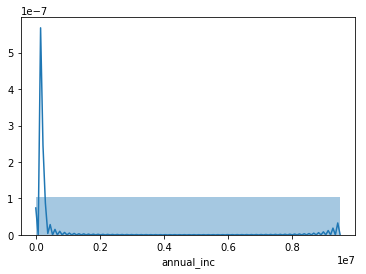

In [25]:
sns.distplot(loan2['annual_inc'], bins = 1)

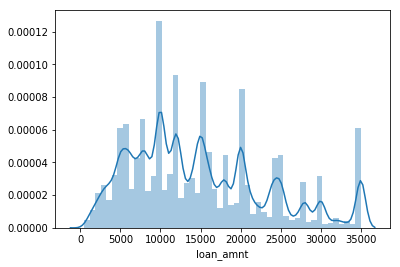

In [20]:
sns.distplot(loan2["loan_amnt"])

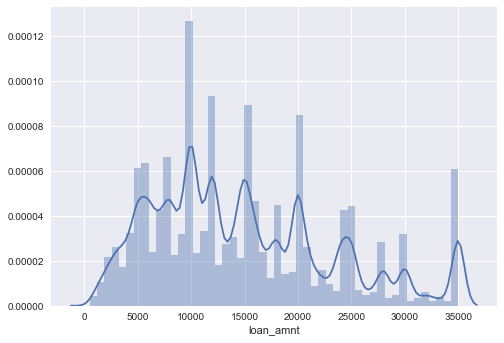

In [9]:
plt.show()

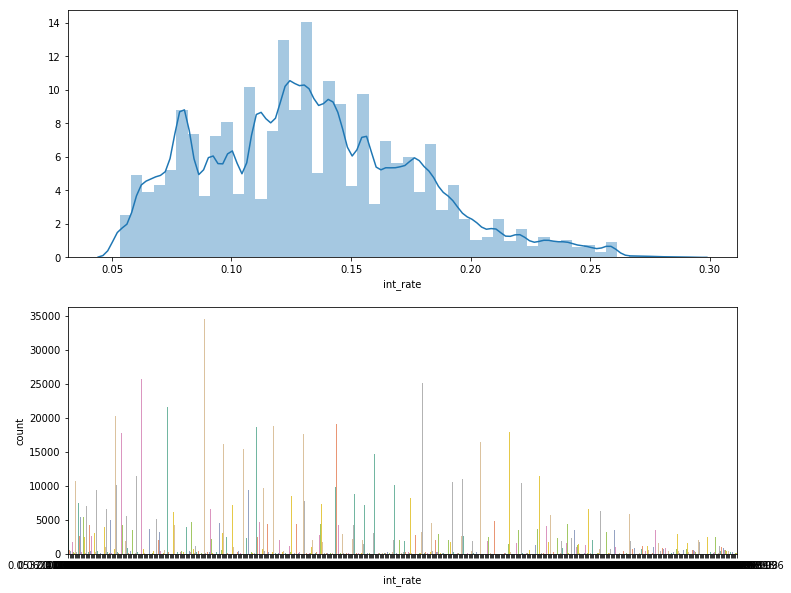

In [26]:
fig, ax=plt.subplots(2,1,figsize=(12,10))
sns.distplot(loan2["int_rate"],ax=ax[0])
sns.countplot(x="int_rate",data=loan2,ax=ax[1],palette="Set2")

plt.show()

## Loan_Status Exploration

In [15]:
print(loan2.loan_status.value_counts())

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64


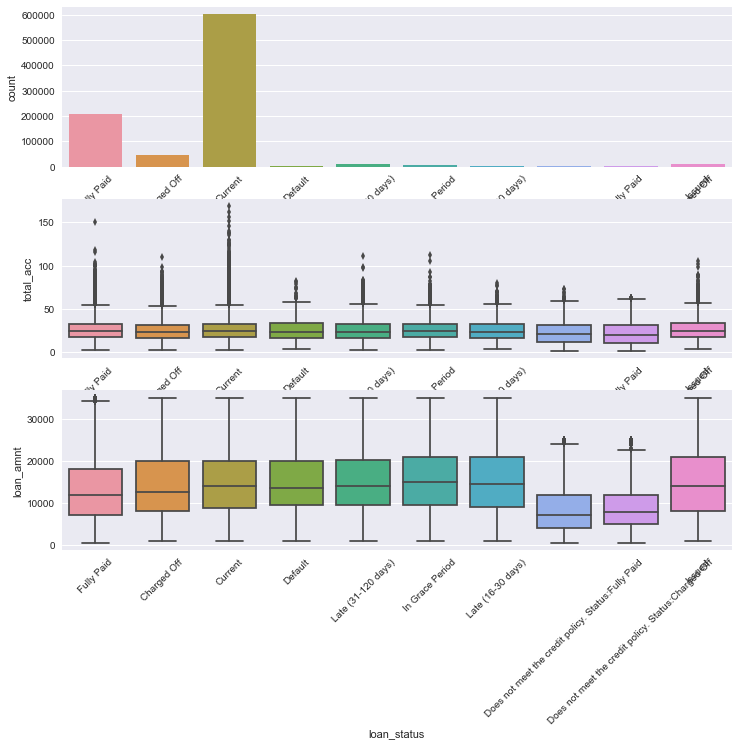

In [17]:
fig, ax =plt.subplots(3,1,figsize=(12,10))
g0 = sns.countplot(x="loan_status", data=loan2,ax=ax[0])
g0.set_xticklabels(g0.get_xticklabels(),rotation=45)
g1 = sns.boxplot(x="loan_status", y="total_acc", data=loan2,ax=ax[1])
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
g2 = sns.boxplot(x="loan_status", y="loan_amnt", data=loan2,ax=ax[2])
g2.set_xticklabels(g2.get_xticklabels(),rotation=45)

plt.show()

In [19]:
loan2.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')

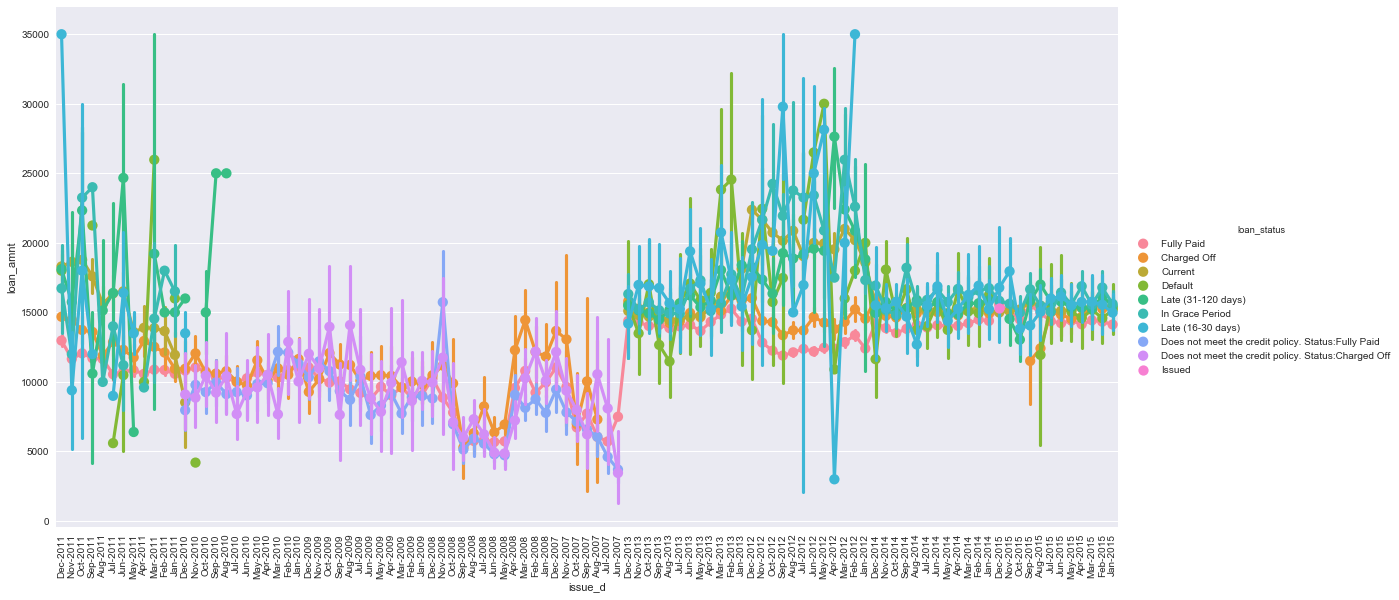

In [20]:
g = sns.factorplot(x='issue_d', y='loan_amnt', data=loan2, 
                   hue='loan_status',
                   size=8,aspect=2)
g.set_xticklabels(rotation=90)
g.set_titles(template="Default by Issue_d")
plt.show()

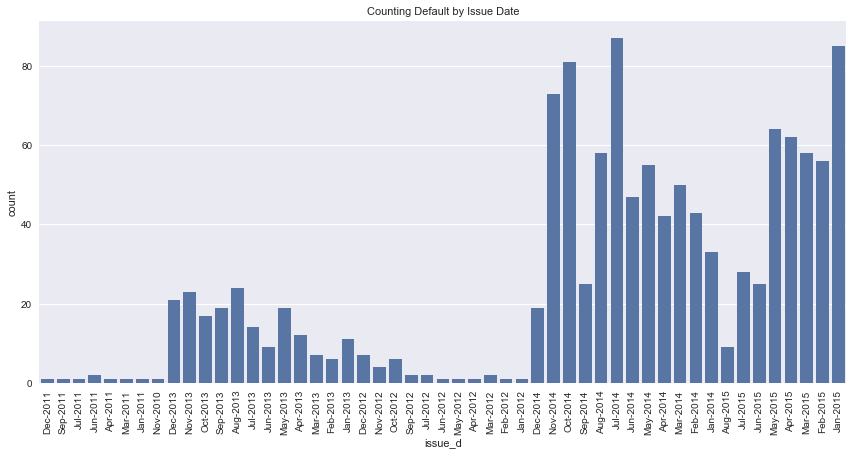

In [21]:
g = sns.factorplot(x='issue_d', data=loan2[loan2["loan_status"] == "Default"], 
                   hue='loan_status', row='loan_status',
                   kind='count',size=6, aspect=2)
g.set_xticklabels(rotation=90)
g.set_titles("Counting Default by Issue Date")
plt.show()

### We can see something happened after Dec 2014. The defaulters are increased.